<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-2.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317282,20.413646,30.365082,-0.274650,125.821360,126.042417,-0.221057
1,0.0,1.0,32.692753,82.090735,30.819132,-0.627014,154.975606,155.394481,-0.418875
2,0.0,2.0,21.597433,38.839911,44.659629,-1.108506,113.988467,114.954973,-0.966505
3,0.0,3.0,90.380421,34.474420,85.951872,-0.308401,220.498311,220.967421,-0.469109
4,0.0,4.0,93.954354,38.886118,50.204802,0.474283,193.519558,193.101334,0.418223
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.863430,89.534973,97.971712,-1.355955,280.014160,281.209839,-1.195679
249996,999.0,246.0,28.030716,97.428337,83.738356,-0.154005,219.043404,219.106955,-0.063550
249997,999.0,247.0,37.149555,85.065599,22.132379,-0.710790,153.636743,154.128518,-0.491775
249998,999.0,248.0,56.567833,79.908480,69.182904,0.834932,216.494149,215.542162,0.951988


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317282,20.413646,30.365082,-0.274650,125.821360,126.042417,-0.221057
1,0.0,1.0,32.692753,82.090735,30.819132,-0.627014,154.975606,155.394481,-0.418875
2,0.0,2.0,21.597433,38.839911,44.659629,-1.108506,113.988467,114.954973,-0.966505
3,0.0,3.0,90.380421,34.474420,85.951872,-0.308401,220.498311,220.967421,-0.469109
4,0.0,4.0,93.954354,38.886118,50.204802,0.474283,193.519558,193.101334,0.418223
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.863430,89.534973,97.971712,-1.355955,280.014160,281.209839,-1.195679
249996,999.0,246.0,28.030716,97.428337,83.738356,-0.154005,219.043404,219.106955,-0.063550
249997,999.0,247.0,37.149555,85.065599,22.132379,-0.710790,153.636743,154.128518,-0.491775
249998,999.0,248.0,56.567833,79.908480,69.182904,0.834932,216.494149,215.542162,0.951988


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

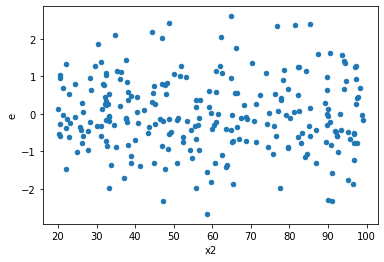

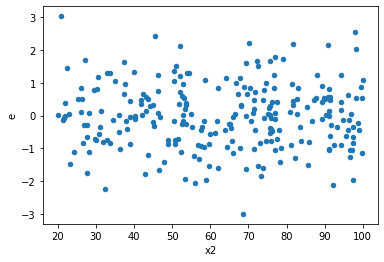

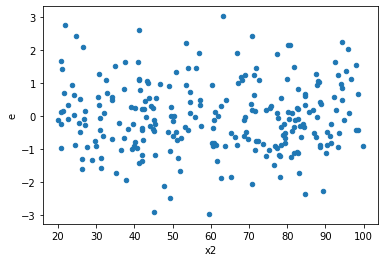

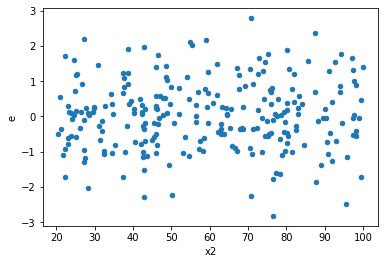

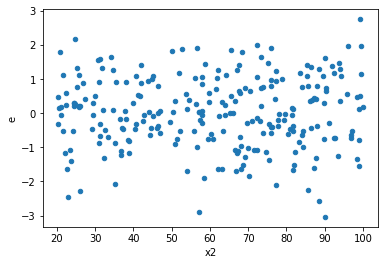

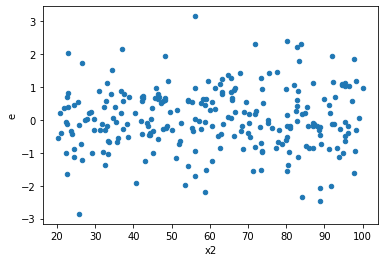

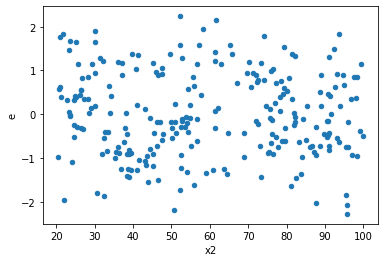

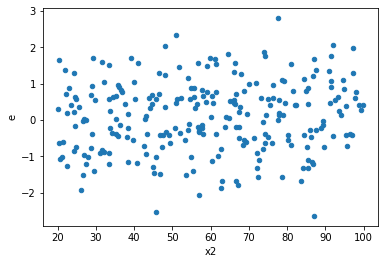

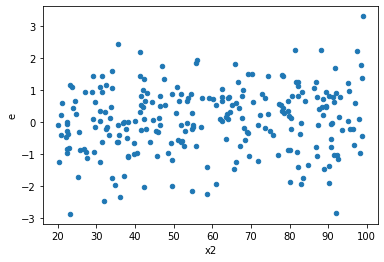

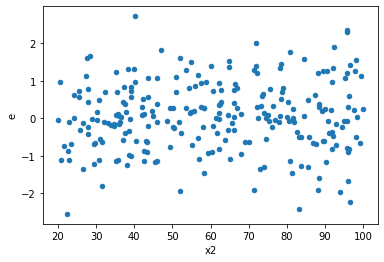

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,128.0,116.0,142.69713390044745,131.48532964361766,1.1148213585972457,1.1334942210656695,1.0167496454247338,0.9295194602992156,0.5352402698503922,0.4647597301496078,Reject001=1 : Homoscedasticity
3.0,116.0,128.0,99.61902603900208,132.93947854971864,0.8587847072327766,1.038589676169677,1.209371414537967,0.29359568176573525,0.8532021591171324,0.14679784088286763,Reject001=1 : Homoscedasticity
5.0,121.0,123.0,89.49614887012785,122.50197729182642,0.7396375939679988,0.9959510348928977,1.3465392281506836,0.10143398605001042,0.9492830069749948,0.05071699302500521,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,90.9107576384756,139.84944459290494,0.7639559465418118,1.1187955567432395,1.4644765340301034,0.03569595784273649,0.9821520210786318,0.017847978921368246,Reject001=1 : Homoscedasticity
10.0,115.0,129.0,105.76170124076639,120.87514476857031,0.919666967311012,0.9370166261129481,1.0188651538204794,0.9153244524978312,0.5423377737510844,0.4576622262489156,Reject001=1 : Homoscedasticity
12.0,122.0,122.0,129.00013830940534,137.75603411763262,1.0573781828639783,1.129147820636333,1.0678750885307298,0.7174238885231956,0.6412880557384022,0.3587119442615978,Reject001=1 : Homoscedasticity
13.0,111.0,133.0,116.84734231810334,144.8353807045398,1.0526787596225526,1.088987824846164,1.0344920659714179,0.8479830619369086,0.5760084690315457,0.4239915309684543,Reject001=1 : Homoscedasticity
15.0,119.0,125.0,116.66729660014732,126.69359143018004,0.9803974504214061,1.0135487314414402,1.0338141240634444,0.8534389069900734,0.5732805465049633,0.4267194534950367,Reject001=1 : Homoscedasticity
16.0,118.0,126.0,105.21502173833646,137.27491850635744,0.8916527265960718,1.089483480209186,1.221869734384532,0.26870223380848834,0.8656488830957558,0.13435111690424417,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,130.0,114.0,124.73208188655512,106.72848639580998,0.9594775529735009,0.9362147929457015,0.9757547636672623,0.8894618435939781,Reject001=1 : Homoscedasticity
1.0,120.0,124.0,123.72033948129948,107.79265167568865,1.031002829010829,0.8692955780297471,0.8431553760757106,0.3481719801775982,Reject001=1 : Homoscedasticity
2.0,128.0,116.0,142.69713390044745,131.48532964361766,1.1148213585972457,1.1334942210656695,1.0167496454247338,0.9295194602992156,Reject001=1 : Homoscedasticity
3.0,116.0,128.0,99.61902603900208,132.93947854971864,0.8587847072327766,1.038589676169677,1.209371414537967,0.29359568176573525,Reject001=1 : Homoscedasticity
4.0,137.0,107.0,162.91163352828727,104.63812837400873,1.1891360111553815,0.9779264334019507,0.822384003367103,0.2799269583353518,Reject001=1 : Homoscedasticity
5.0,121.0,123.0,89.49614887012785,122.50197729182642,0.7396375939679988,0.9959510348928977,1.3465392281506836,0.10143398605001042,Reject001=1 : Homoscedasticity
6.0,134.0,110.0,124.57468224540798,100.17812879528942,0.9296618078015522,0.9107102617753584,0.9796145804128384,0.9052980407968821,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,90.9107576384756,139.84944459290494,0.7639559465418118,1.1187955567432395,1.4644765340301034,0.03569595784273649,Reject001=1 : Homoscedasticity
8.0,125.0,119.0,138.3635865539615,117.98948519948281,1.106908692431692,0.9915082789872506,0.8957453182602386,0.5430408880865036,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      992
Reject001=0 : Heteroscedasticity      8
Name: Result_test, dtype: int64